---
# Logisitic Regression
---
## Calculating Cost
The cost function of logistic regression is 

$$
c(\theta) = \begin{cases}
    -log(\hat{p}) \text{ if y = 1}\\
    -log(1-\hat{p}) \text{ if y = 0}
\end{cases}
$$

This cost function grows large as t approaches zero, so the cost will be large if a prediction differs from the true label, and is small when the prediction matched the true label. The cost function can be written as the average of each instance, as shown below:

$
J(\theta) = -\frac{1}{m}\Sigma^m_{i=1}[y^ilog(\hat{p}^i + (1-y^i)log(1-\hat{p}^i)]
$

The function above is convex, so we can apply gradient descent to minimize the cost function and be guaranteed to find the global minimum -- assuming the learning rate is not too large and it is given enough time. The gradient, or partial derivative, is:

$
\frac{\partial}{\partial\theta_j} = \frac{1}{m}\Sigma^m_{i=1}(\sigma(\theta^Tx^i) - y^i)x^i_j
$

## Error Analysis
After training the model, we will calculate the confusion matrix and F score to compare to the other models. The confusion matrix shows the predicted vs actual labels in an easily readable format. The F score is a ratio between the precision and recall.

Precision is calculated using the equation:
$
precision = \frac{true positives}{True Positives + False Positives}
$

Recall is calculated using the equation:
$
recall = \frac{True Positives}{True Positives + False Negatives}
$

The F score is calculated using the equation:
$
F = \frac{precision*recall}{precision + recall}
$

These metrics will allow us to easily compare the models.



## Logistic Regression

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.





### Estimating Probabilities

Instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result. 
$\hat{p} = h_\theta(x) = \sigma(\theta^T \cdot x)$

### The Sigmoid Activation Function

We must first decide on an activation function before deciding on a cost/ loss function. For this purpose, we choose the sigmoid activation function:
$$\sigma(t) = \frac{1}{1 + exp(-t)}$$

The sigmoid function, denoted as $\sigma(t)$ outputs a number between 0 and 1. This output is then used to predict if the an instance $x$ belongs to the specified class using

$$
\hat{y} = \begin{cases}
    1 &\text{if } \hat{p} \geq 0.5\\
    0 &\text{if } \hat{p} \lt 0.5
\end{cases}
$$

Notice that $\sigma(t)$ < 0.5 when t < 0, and $\sigma(t)$ ≥ 0.5 when t ≥ 0, so a Logistic Regression model predicts 1 if $\theta^T \cdot x$ is positive, and 0 if it is negative.

### Cost Function

The cost function of logistic regression is 

$$
c(\theta) = \begin{cases}
    -log(\hat{p}) \text{ if y = 1}\\
    -log(1-\hat{p}) \text{ if y = 0}
\end{cases}
$$

It can be written in a single expression called the log loss:
$$
J(\theta) = -\frac{1}{m}\Sigma^m_{i=1}[y^ilog(\hat{p}^i + (1-y^i)log(1-\hat{p}^i)]
$$
 
 
The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).

This cost function is convex, so Gradient Descent is guaranteed to find the global minimum. The partial derivatives of the cost function with regards to the $j^{th}$ model parameter $θ_j$ is given by
$$
\frac{\partial}{\partial\theta_j} = \frac{1}{m}\Sigma^m_{i=1}(\sigma(\theta^Tx^i) - y^i)x^i_j
$$


### Evaluation

- Precision: measures how precise the predictions are.
- Recall: ndicates what percentage of the classes we’re interested in were actually captured by the model.

When evaluating models we want to visualize an ROC Curve. Illustrating the true positive rate against the false positive rate of our classifier. True positive rate is another name for recall.

$$TPR = \frac{TP}{TP+FN}$$
False positive rates is the ratio of false positive predictions compared to all values that are actually negative.

$$FPR = \frac{FP}{FP+TN}$$

If TPR is our y-axis and FPR is our x-axis, we want our ROC curve to hug the left side of our chart meaning higher the TPR the lower the FPR.

---
## Implementation

### Data Preparation

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Information on current medical condition
- Tot Chol: total cholesterol level
- Sys BP: systolic blood pressure
- Dia BP: diastolic blood pressure
- BMI: Body Mass Index
- Heart Rate: heart rate - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.
- Glucose: glucose level
- Target variable to predict
- TenYearCHD: 10 year risk of coronary heart disease (binary: “1:Yes”, “0:No”)

### Import library

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

### 1. Importing Dataset and Cleaning

In [2]:
df = pd.read_csv('/Users/yihanhong/Desktop/577/dataset/lgrg_heart.csv')
df.dropna(axis=0, inplace=True)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Above is the results of our cleaning. 

---
Next, we need to shuffle and split the data, train and test our model, then view the metrics. Using sci-kit learn, this process becomes incredible simple. The [scikit-learn website](https://scikit-learn.org/stable/) provides a model, a data shuffle and split method, and convenient methods to display the confusion matrix and f score. 

### 2. Train the model
Next, we will create a logistic regression model using sci-kit learn's LogisticRegression module and fit the data to the model. In order to train a better performance, we scale the data.

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
# scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

LogisticRegression()

### 3. Model Performance

**ROC curve**
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

In [7]:

y_train_score = model.decision_function(X_train)
# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

#Calculate the probability scores of each point in the test set
y_test_score = model.decision_function(X_test)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

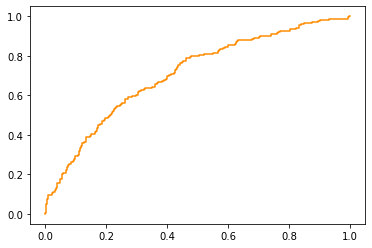

In [8]:
plt.plot(test_fpr, test_tpr, color='darkorange',  label='ROC curve')

A model that performs well at distinguishing positive and negative instances will have a ROC curve that is closer to the top-left corner of the plot, where the TPR is high and the FPR is low. A model that performs poorly will have a ROC curve that is closer to the diagonal line, where the TPR is equal to the FPR.

From this plot, the model performance is good.

---
**Confusion Matrix**

A confusion matrix represents the prediction summary in matrix form.

Model F1 Score: 0.17
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       923
           1       0.61      0.10      0.17       174

    accuracy                           0.85      1097
   macro avg       0.73      0.54      0.54      1097
weighted avg       0.81      0.85      0.80      1097



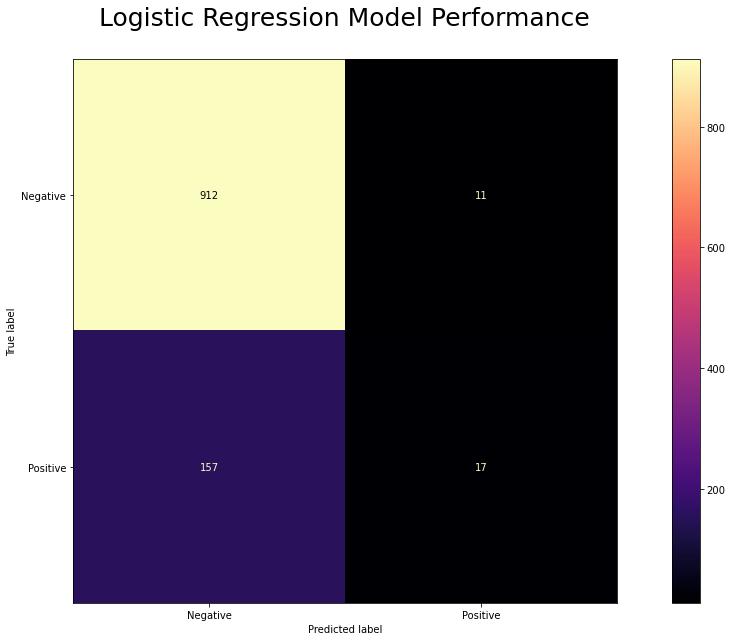

In [9]:
y_hat = model.predict(X_test)
print(f"Model F1 Score: {np.round(f1_score(y_test, y_hat),2)}")

labels = ['test1', 'test2']
displabels = ['Negative', 'Positive']

fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.set_title('Logistic Regression Model Performance\n', fontsize = 25)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels = displabels, cmap = 'magma', colorbar=True, ax=ax)

print(classification_report(y_test, y_hat))

Most of the samples are classified into the right category